In [4]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

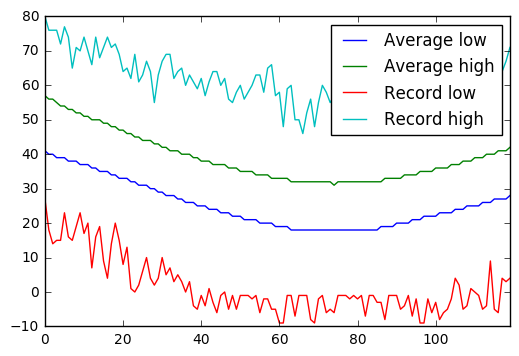

In [5]:
avsdf = pd.read_pickle('averages_frame.p')
for col in range(1, 5):
    avsdf[avsdf.columns[col]] = avsdf[avsdf.columns[col]].astype(int)
avsdf.plot()

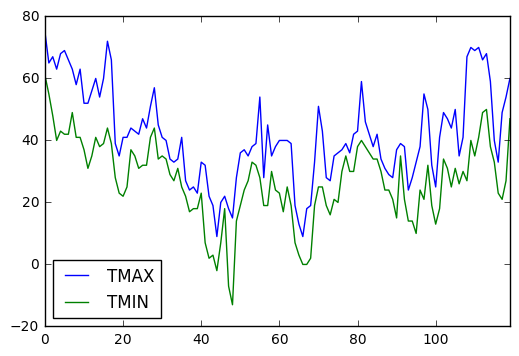

In [10]:
ddf = pd.read_pickle('daily_frame.p')
ddf = ddf[['TMAX', 'TMIN']]
ddf.plot()

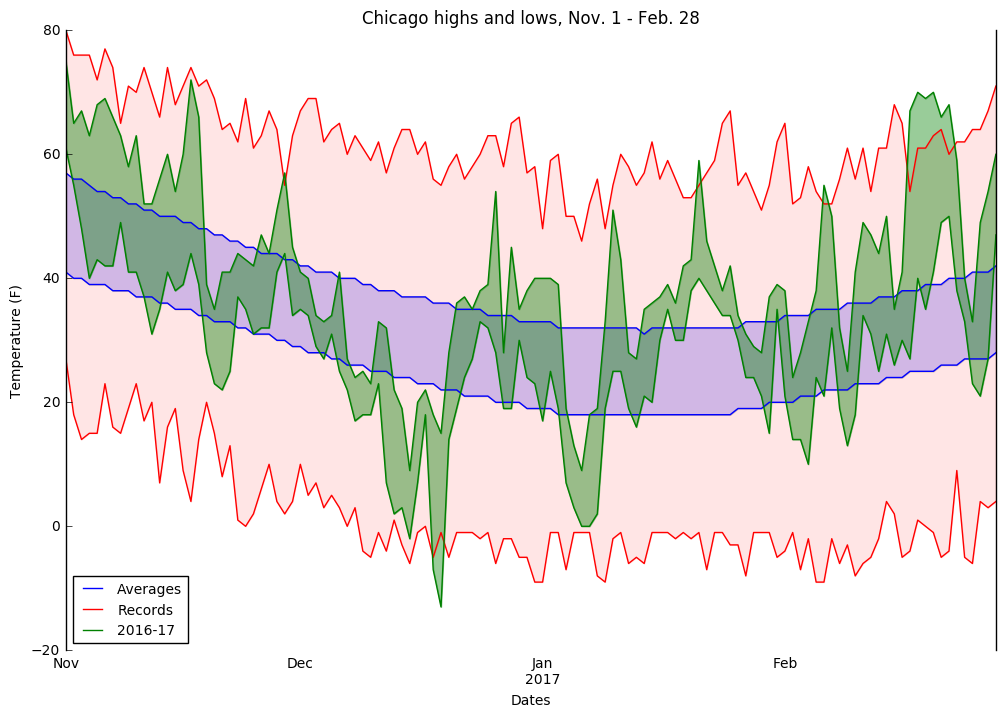

In [150]:
alldf = avsdf.merge(ddf, how='inner', left_index=True, right_index=True)

alldf['Date'] = pd.to_datetime(alldf['Date'], format='%d-%b')
alldf['Date'].iloc[0:61] = alldf['Date'].iloc[0:61].apply(lambda x: x.replace(year=2016))
alldf['Date'].iloc[61:] = alldf['Date'].iloc[61:].apply(lambda x: x.replace(year=2017))

dfplot = alldf.plot(x='Date', style=['b', 'b', 'r', 'r', 'g', 'g'], title='Chicago highs and lows, Nov. 1 - Feb. 28', figsize=(12, 8))

dfplot.set_xlabel('Dates')
dfplot.set_ylabel('Temperature (F)')

lines, label = dfplot.get_legend_handles_labels()
lines = [lines[0], lines[2], lines[4]]

dfplot.legend(handles = lines, labels = ['Averages', 'Records', '2016-17'], loc=3, prop={'size':10})

d = alldf['Date'].dt.date
d = d.values
dfplot.fill_between(d, alldf['Average high'], alldf['Average low'], alpha=0.2)
dfplot.fill_between(d, alldf['Record high'], alldf['Record low'], alpha=0.1, color='r')
dfplot.fill_between(d, alldf['TMAX'], alldf['TMIN'], alpha=0.4, color='g')

dfplot.spines['bottom'].set_visible(False)
dfplot.spines['top'].set_visible(False)
dfplot.xaxis.set_ticks_position('bottom')
dfplot.tick_params(axis='x', which='both',length=0)
dfplot.yaxis.set_ticks_position('left')

fig = dfplot.get_figure()

fig.savefig('Chicagotemps.png', bbox_inches='tight')